# *Import Libraries*

In [1]:
from IPython.display import display, clear_output
#!pip install keyboard
import keyboard
import folium
import requests
import time
import matplotlib.pyplot as plt
from turtle import *
import turtle
import os

# *Get Location of ISS*
## *Method to Request Location of ISS*

In [2]:
def get_iss_location():
    url = 'http://api.open-notify.org/iss-now.json'
    response = requests.get(url)
    if response.status_code == 200:
        data = response.json()
        latitude = data['iss_position']['latitude']
        longitude = data['iss_position']['longitude']
    
        return float(latitude), float(longitude)
    else:
        print('---Request Failed---')
        return None


# *Display ISS Location using tutrle*

In [3]:
# Get the current working directory
current_dir = os.getcwd()
# Construct the full path to the image file
image_path = os.path.join(current_dir, 'worldmap.gif')

# Create a turtle screen
screen = turtle.Screen()
screen.setup(1280,720)
screen.setworldcoordinates(-180, -90, 180, 90)

# Set the background picture
screen.bgpic(image_path)

    #set iss icon
screen.register_shape('ISS.gif')#register shape
iss= turtle.Turtle()
iss.shape('ISS.gif')
iss.penup()
    
    
#pen to trace path of iss
pen = turtle.Turtle()
pen.penup()
pen.color("red")
pen.width(1)
try: 
    while True:
        #get location
        location = get_iss_location()
        if location:
            latitude, longitude = location
            
            #draw path
            pen.goto(longitude,latitude)
            pen.down()
            
            #set turtle position
            iss.goto(longitude, latitude)
          #  iss.stamp()
            time.sleep(10)
            
except KeyboardInterrupt:
    pass


turtle.exitonclick()## keep open

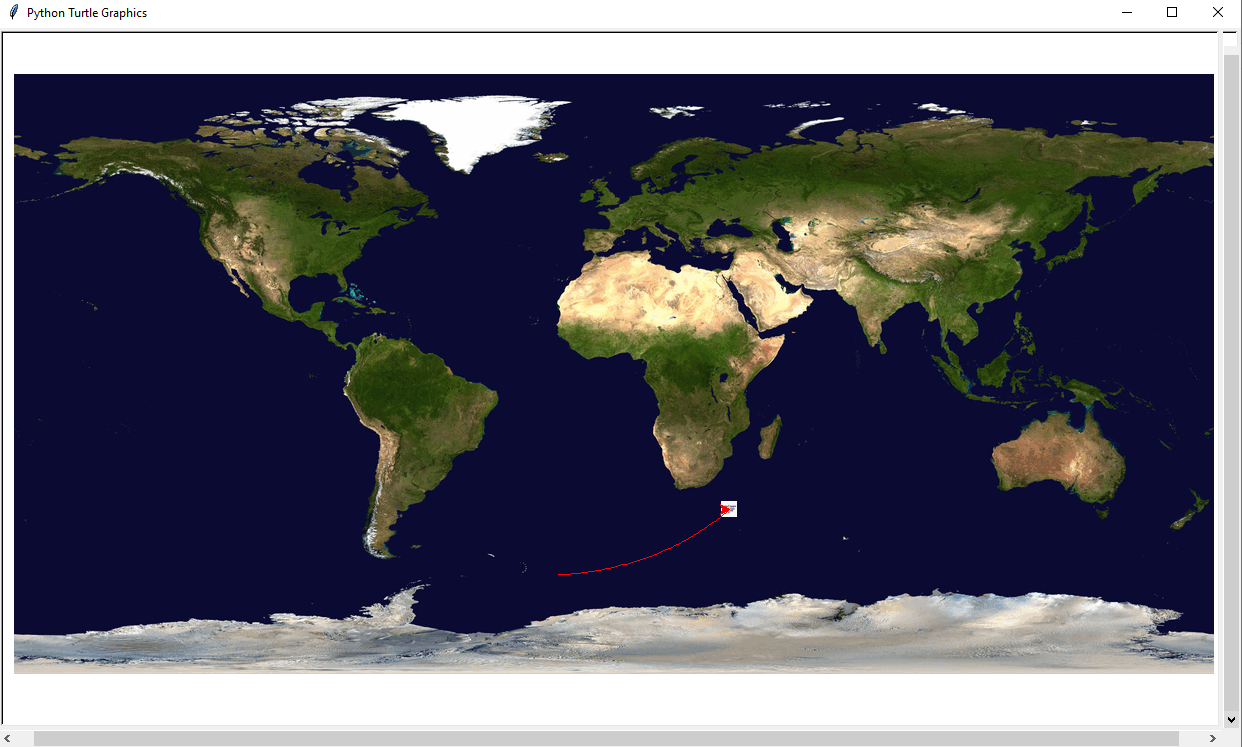

## Display location using folium

In [ ]:
m = folium.Map(location=[0, 0], zoom_start=1)
    
try:
    while True:
        location = get_iss_location()#get new coords usong previously defined method
        if location:
            latitude, longitude = location
            #marker.location = [latitude, longitude]
            folium.Circle([latitude, longitude], 
                          popup=location, color="red",
                          fill = True,
                          radius = 25000
                          ).add_to(m)
            # Clear the previous display
            clear_output(wait=True)

            # Display the updated map
            display(m)

            # Wait for a moment to see the movement
            time.sleep(10)
except KeyboardInterrupt:
    pass



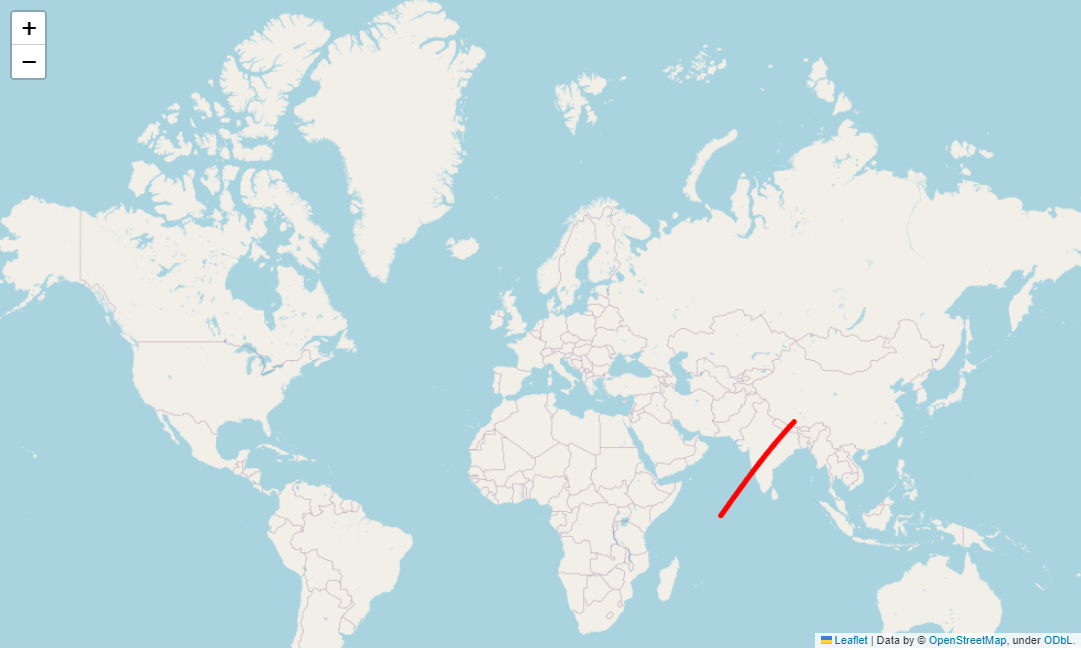